In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

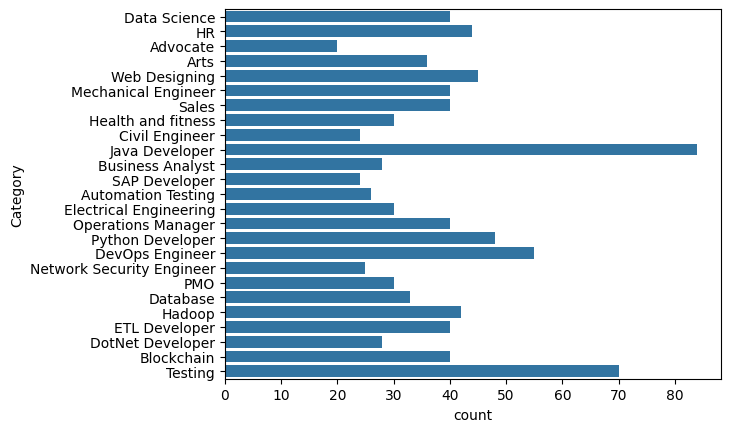

In [6]:
sns.countplot(df["Category"])

In [7]:
counts=df["Category"].value_counts()
labels=df["Category"].unique()

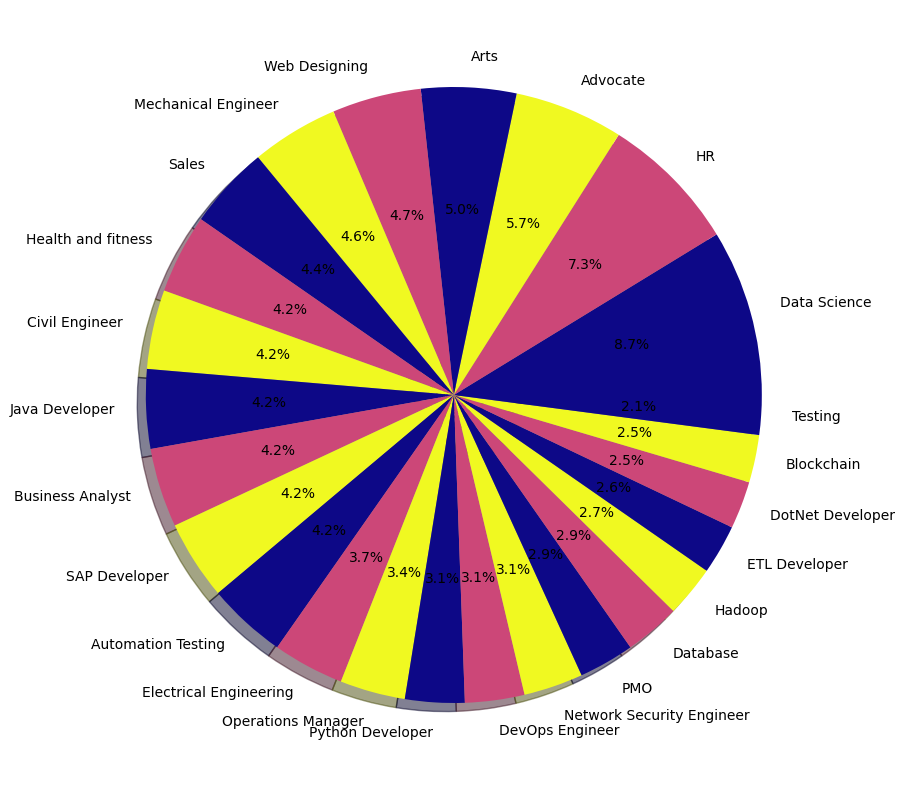

In [8]:
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct="%1.1f%%",shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [9]:
df["Resume"]

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [10]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
import re

In [12]:
def clean(txt):
    cleanTxt = txt.lower()
    cleanTxt = re.sub(r'http\S+\s', ' ', cleanTxt)  # remove URLs
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)       # remove mentions
    cleanTxt = re.sub(r'#\S+', ' ', cleanTxt)       # remove hashtags
    cleanTxt = re.sub(r'[^A-Za-z\s]', ' ', cleanTxt)  # remove special chars
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt).strip()   # collapse spaces
    
    return cleanTxt

In [13]:
df["Resume"]=df['Resume'].apply(lambda x: clean(x))

In [14]:
df.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may to may b e uit rgpv data...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


Stopwords and lemmatization

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

In [18]:
def final_words(txt):
    words= txt.split()
    words=[lemmatizer.lemmatize(word) for word in words if word not in stop_words ]

    return ' '.join(words)

In [19]:
df['Resume']=df['Resume'].apply(final_words)

**Preprocessing**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [23]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [24]:
df.head()

,Category,Resume
0,6,skill programming language python panda numpy ...
1,6,education detail may may b e uit rgpv data sci...
2,6,area interest deep learning control system des...
3,6,skill r python sap hana tableau sap hana sql s...
4,6,education detail mca ymcaust faridabad haryana...


Vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf=TfidfVectorizer()

In [27]:
X=tfidf.fit_transform(df['Resume'])
y=df['Category']

Training

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
classifier=KNeighborsClassifier()

In [32]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
ypred= classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,accuracy_score

In [35]:
accuracy_score(y_test,ypred)

0.9792746113989638

LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9948186528497409


In [38]:
import joblib

# Save the trained model and tfidf vectorizer
joblib.dump(clf, "resume_role_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

Multinomial Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb=MultinomialNB()

In [41]:
nb.fit(X_train,y_train)

MultinomialNB()

In [42]:
ypred=nb.predict(X_test)

In [43]:
accuracy_score(y_test,ypred)

0.9430051813471503